In [1]:
import torch as tc
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pickle
import utils
import os
from wish_utils import *
from WishDataSet import WishDataSet, get_transform

In [2]:
annotations_dir = "/home/wj1132075/Desktop/CNN_Model_Data/Annotations/"

In [3]:
model_path = '/mnt/ceph/home/wj1132075/Desktop/CNN_Model_Data/fasterrcnn_resnet50_fpn_20_epochs.pt'

In [4]:
device = tc.device('cuda') if tc.cuda.is_available() else tc.device('cpu')
device

device(type='cpu')

In [5]:
stats=None
dataset_test = WishDataSet(annotations_dir, transforms=get_transform(train=False, stats=stats))
data_loader = tc.utils.data.DataLoader(dataset_test, batch_size=8, shuffle=False, num_workers=2, collate_fn=utils.collate_fn)

In [6]:
r_model = get_object_detection_model(2)
# r_model.load_state_dict(tc.load(model_save_path))
r_model.load_state_dict(tc.load(model_path, map_location=device))
r_model = r_model.to(device)

/home/wj1132075/.conda/envs/cuda_1/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/wj1132075/.conda/envs/cuda_1/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


[W NNPACK.cpp:64] Could not initialize NNPACK! Reason: Unsupported hardware.


Original predictions-{'boxes': tensor([[1.5416e-01, 5.7452e+01, 3.1966e+00, 7.5517e+01],
        [7.4959e-01, 5.7528e+01, 5.4885e+00, 7.4631e+01],
        [6.1077e-02, 5.3519e+01, 4.4882e+00, 8.0680e+01],
        [5.6211e-02, 6.0416e+01, 1.4800e+00, 7.7535e+01]]), 'labels': tensor([1, 1, 1, 1]), 'scores': tensor([0.4683, 0.4269, 0.1693, 0.0585])}
nms predicitons-1 {'boxes': tensor([[ 0.1542, 57.4517,  3.1966, 75.5173]]), 'labels': tensor([1]), 'scores': tensor([0.4683])}
tensor([ 0.1542, 57.4517,  3.1966, 75.5173]) tensor(0.4683)


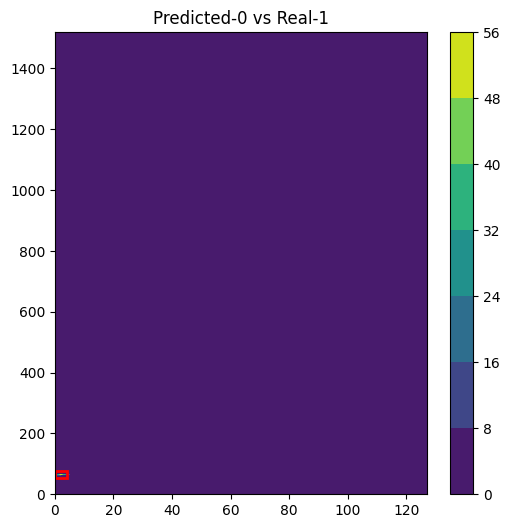

Original predictions-{'boxes': tensor([[10.2579, 73.0834, 14.6524, 93.0253],
        [10.3514, 71.0548, 12.5192, 95.9345],
        [ 9.1944, 73.0571, 12.8461, 91.7588]]), 'labels': tensor([1, 1, 1]), 'scores': tensor([0.6825, 0.5905, 0.0800])}
nms predicitons-1 {'boxes': tensor([[10.2579, 73.0834, 14.6524, 93.0253]]), 'labels': tensor([1]), 'scores': tensor([0.6825])}
tensor([10.2579, 73.0834, 14.6524, 93.0253]) tensor(0.6825)


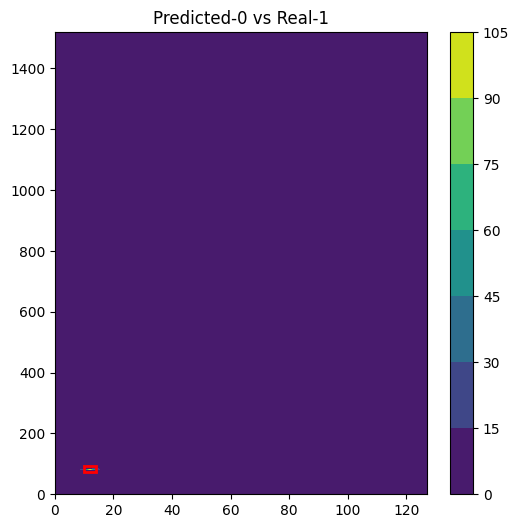

Original predictions-{'boxes': tensor([[  58.8662,  288.0801,   62.8325,  307.9983],
        [  90.9684, 1153.4199,   94.8069, 1173.5056],
        [  93.7671,  288.5566,   97.7492,  308.7545],
        [  91.1931, 1154.2556,   92.5940, 1170.7891],
        [  76.4639,  287.8280,   80.5282,  307.8470],
        [   5.9372, 1157.8044,    9.9328, 1177.7490],
        [  88.6097, 1150.8389,   97.8038, 1177.1038],
        [  92.2934,  283.0590,  100.0918,  309.7592]]), 'labels': tensor([1, 1, 1, 1, 1, 1, 1, 1]), 'scores': tensor([0.9590, 0.9501, 0.9477, 0.9287, 0.6098, 0.5970, 0.2986, 0.1568])}
nms predicitons-5 {'boxes': tensor([[  58.8662,  288.0801,   62.8325,  307.9983],
        [  90.9684, 1153.4199,   94.8069, 1173.5056],
        [  93.7671,  288.5566,   97.7492,  308.7545],
        [  76.4639,  287.8280,   80.5282,  307.8470],
        [   5.9372, 1157.8044,    9.9328, 1177.7490]]), 'labels': tensor([1, 1, 1, 1, 1]), 'scores': tensor([0.9590, 0.9501, 0.9477, 0.6098, 0.5970])}
tensor([ 58.

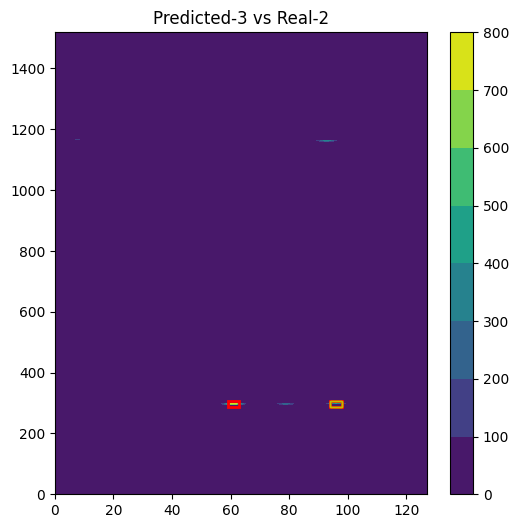

Original predictions-{'boxes': tensor([[  58.9019,  288.8848,   62.9075,  308.8722],
        [  76.9951,  288.8301,   80.9917,  308.8573],
        [  91.1863, 1151.4982,   95.1877, 1171.5629],
        [  23.1655, 1155.2114,   27.1645, 1175.1085],
        [  94.5702,  290.3040,   98.6039,  310.1014],
        [  22.7452, 1150.4827,   24.6526, 1182.6130],
        [  88.5921, 1148.3868,   98.4319, 1173.8745]]), 'labels': tensor([1, 1, 1, 1, 1, 1, 1]), 'scores': tensor([0.9622, 0.9089, 0.8996, 0.8037, 0.5338, 0.1030, 0.0619])}
nms predicitons-5 {'boxes': tensor([[  58.9019,  288.8848,   62.9075,  308.8722],
        [  76.9951,  288.8301,   80.9917,  308.8573],
        [  91.1863, 1151.4982,   95.1877, 1171.5629],
        [  23.1655, 1155.2114,   27.1645, 1175.1085],
        [  94.5702,  290.3040,   98.6039,  310.1014]]), 'labels': tensor([1, 1, 1, 1, 1]), 'scores': tensor([0.9622, 0.9089, 0.8996, 0.8037, 0.5338])}
tensor([ 58.9019, 288.8848,  62.9075, 308.8722]) tensor(0.9622)
tensor([ 76.9

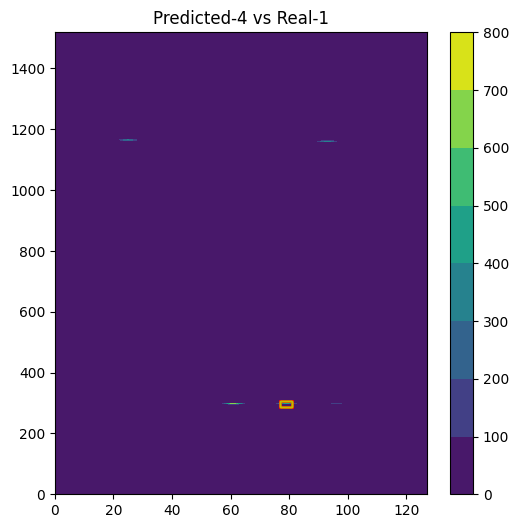

Original predictions-{'boxes': tensor([[  42.8384,  283.5018,   46.8771,  303.5104],
        [ 110.6888,  287.1125,  114.6747,  307.0659],
        [ 107.7410, 1154.6326,  111.7412, 1174.5729],
        [ 108.3630, 1154.1326,  109.7504, 1173.7151],
        [   6.3770, 1160.7009,   10.6599, 1180.7067],
        [ 111.5214,  284.9553,  113.5652,  309.4307],
        [ 107.8196, 1157.5664,  109.4216, 1175.0284]]), 'labels': tensor([1, 1, 1, 1, 1, 1, 1]), 'scores': tensor([0.9600, 0.9142, 0.8958, 0.6314, 0.5626, 0.5190, 0.1267])}
nms predicitons-4 {'boxes': tensor([[  42.8384,  283.5018,   46.8771,  303.5104],
        [ 110.6888,  287.1125,  114.6747,  307.0659],
        [ 107.7410, 1154.6326,  111.7412, 1174.5729],
        [   6.3770, 1160.7009,   10.6599, 1180.7067]]), 'labels': tensor([1, 1, 1, 1]), 'scores': tensor([0.9600, 0.9142, 0.8958, 0.5626])}
tensor([ 42.8384, 283.5018,  46.8771, 303.5104]) tensor(0.9600)
tensor([110.6888, 287.1125, 114.6747, 307.0659]) tensor(0.9142)
tensor([ 107.7

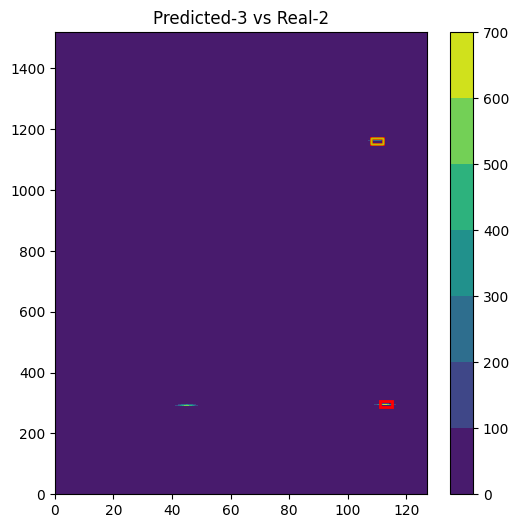

Original predictions-{'boxes': tensor([[ 21.9236, 385.7452,  25.9401, 405.7054],
        [118.6218, 390.7654, 122.5898, 410.8377],
        [ 21.5836, 382.3666,  23.4657, 408.4365],
        [ 22.7895, 385.8867,  24.3371, 405.1361],
        [119.0022, 388.7270, 120.7876, 415.4254],
        [117.6412, 390.6088, 119.3848, 413.1125]]), 'labels': tensor([1, 1, 1, 1, 1, 1]), 'scores': tensor([0.9184, 0.7604, 0.7286, 0.6581, 0.2009, 0.0585])}
nms predicitons-2 {'boxes': tensor([[ 21.9236, 385.7452,  25.9401, 405.7054],
        [118.6218, 390.7654, 122.5898, 410.8377]]), 'labels': tensor([1, 1]), 'scores': tensor([0.9184, 0.7604])}
tensor([ 21.9236, 385.7452,  25.9401, 405.7054]) tensor(0.9184)
tensor([118.6218, 390.7654, 122.5898, 410.8377]) tensor(0.7604)


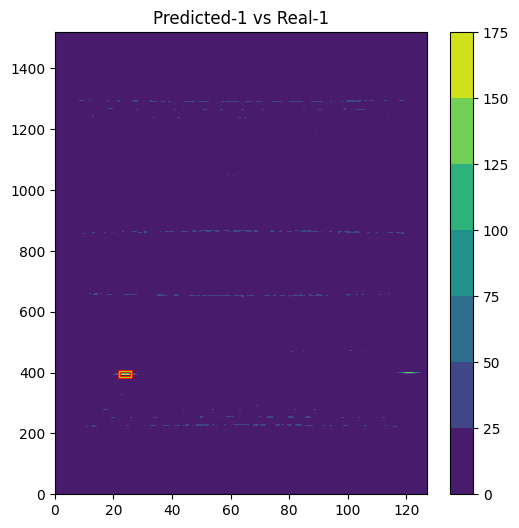

Original predictions-{'boxes': tensor([[ 54.0354, 391.0813,  58.0270, 411.1381],
        [ 87.1076, 392.9749,  91.1218, 412.9503],
        [ 85.6726, 392.5144,  89.2246, 412.2716]]), 'labels': tensor([1, 1, 1]), 'scores': tensor([0.9283, 0.3431, 0.0602])}
nms predicitons-2 {'boxes': tensor([[ 54.0354, 391.0813,  58.0270, 411.1381],
        [ 87.1076, 392.9749,  91.1218, 412.9503]]), 'labels': tensor([1, 1]), 'scores': tensor([0.9283, 0.3431])}
tensor([ 54.0354, 391.0813,  58.0270, 411.1381]) tensor(0.9283)
tensor([ 87.1076, 392.9749,  91.1218, 412.9503]) tensor(0.3431)


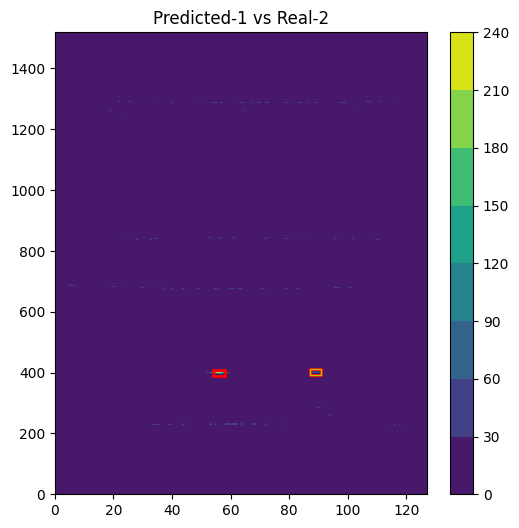

Original predictions-{'boxes': tensor([[ 21.9822, 385.2271,  26.0220, 405.0396],
        [118.8701, 390.5603, 122.8485, 410.5372],
        [ 21.6919, 381.3214,  23.4318, 407.9572],
        [118.5564, 389.4639, 120.0829, 410.7836],
        [ 20.6793, 382.4130,  22.5692, 410.9643]]), 'labels': tensor([1, 1, 1, 1, 1]), 'scores': tensor([0.8696, 0.7936, 0.5277, 0.4021, 0.0527])}
nms predicitons-2 {'boxes': tensor([[ 21.9822, 385.2271,  26.0220, 405.0396],
        [118.8701, 390.5603, 122.8485, 410.5372]]), 'labels': tensor([1, 1]), 'scores': tensor([0.8696, 0.7936])}
tensor([ 21.9822, 385.2271,  26.0220, 405.0396]) tensor(0.8696)
tensor([118.8701, 390.5603, 122.8485, 410.5372]) tensor(0.7936)


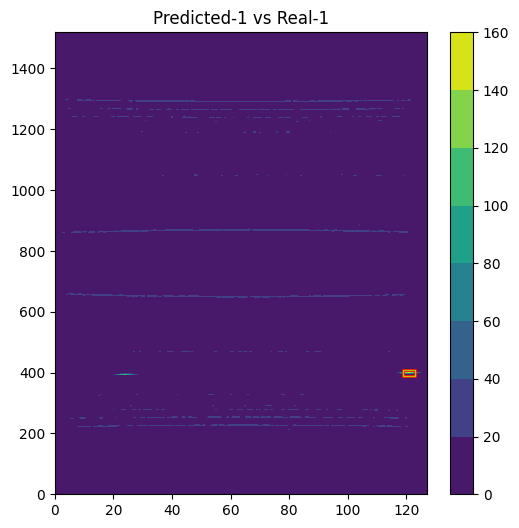

In [7]:
r_model.eval()
probe = 0
for img, target in data_loader:
    imgs = list(img)
    targets = list(target)
    with tc.no_grad():
        for img, target in zip(imgs, targets):
            prediction = r_model([img.to(device)])[0]
            print(f"Original predictions-{prediction}")
            nms_prediction = apply_nms(prediction, iou_thresh=0.01)
            print(f"nms predicitons-{len(nms_prediction['boxes'])} {nms_prediction}")
            plot_bin_detections(img[0,:,:], target['boxes'], nms_prediction, 0.8)
            probe += 1

    if probe >= 1:
        break